<div class="alert alert-block alert-success">
    <h1 align="center">Multiple Lienar regression</h1>
    <h4 align="center"><a href="https://mohammadamirifard.com/">Mohammad Amirifard</a></h5>
</div>

### Problem:
You are an owner of a bike shop.You rent bicycles to customers. Now you want to predict the the number of requsets for bicycles by custonmers based on some information you have. So this is a kind of linear regression with multiple features.

Let's get started with some inforrmation related to culomns exited in the dataset.

##### datetime:
hourly date + timestamp  
##### season:
1 = spring, 2 = summer, 3 = fall, 4 = winter 
##### holiday:
whether the day is considered a holiday
##### workingday:
whether the day is neither a weekend nor holiday
##### weather:
(1 = Clear, Few clouds, Partly cloudy, Partly cloudy)(2 =  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) (3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
(4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) 
##### temp:
temperature in Celsius
##### atemp:
"feels like" temperature in Celsius
##### humidity:
relative humidity
##### windspeed:
wind speed
##### casual:
number of non-registered user rentals initiated
##### registered:
number of registered user rentals initiated
##### count:
number of total rentals


<div class="alert alert-block alert-success">
    <h1 align="center">Let's get started</h1>
    <h2 align="center">Step1: Import libararies</h2>
</div> 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import time

<div class="alert alert-block alert-success">
    <h2 align="center">Step2: Load dataset and EDA</h2>
</div> 

In [2]:
# Load dataset
data_unseen =  pd.read_csv('test.csv')
data = pd.read_csv('train.csv')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
# As we understood, there is no null value in our data. Great Luck
# No we must change the type of columns to suitable value to use less memory
# Here we have a column called datetime with datetime64 type. So I change the type of it
data['datetime'] = data['datetime'].astype('datetime64')
#To machine learning we need numerical values so we must split this column to numerical values
data['datetime_year'] = data['datetime'].dt.year
data['datetime_month'] = data['datetime'].dt.month
data['datetime_day'] = data['datetime'].dt.day
data['datetime_hour'] = data['datetime'].dt.hour
# Because all minutes and seconds are zero, I decided to miss them

data.drop(['datetime'], axis=1, inplace=True)
for i in data.columns:        
    if i in ['temp','atemp', 'windspeed']:
        data[f'{i}'] = data[f'{i}'].astype('float16')
    else:
        data[f'{i}'] = data[f'{i}'].astype('int16')
        

# Change the order of columns in the table
data = data[['datetime_year', 'datetime_month', 'datetime_day', 'datetime_hour',
            'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
            'humidity', 'windspeed', 'casual', 'registered', 'count']]

# Similarly, we do these actions on data_unseen.
data_unseen['datetime'] = data_unseen['datetime'].astype('datetime64')
data_unseen['datetime_year'] = data_unseen['datetime'].dt.year
data_unseen['datetime_month'] = data_unseen['datetime'].dt.month
data_unseen['datetime_day'] = data_unseen['datetime'].dt.day
data_unseen['datetime_hour'] = data_unseen['datetime'].dt.hour
# Change the order of columns in the table
data_unseen = data_unseen[['datetime_year', 'datetime_month', 'datetime_day', 'datetime_hour',
            'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
            'humidity', 'windspeed']]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime_year   10886 non-null  int16  
 1   datetime_month  10886 non-null  int16  
 2   datetime_day    10886 non-null  int16  
 3   datetime_hour   10886 non-null  int16  
 4   season          10886 non-null  int16  
 5   holiday         10886 non-null  int16  
 6   workingday      10886 non-null  int16  
 7   weather         10886 non-null  int16  
 8   temp            10886 non-null  float16
 9   atemp           10886 non-null  float16
 10  humidity        10886 non-null  int16  
 11  windspeed       10886 non-null  float16
 12  casual          10886 non-null  int16  
 13  registered      10886 non-null  int16  
 14  count           10886 non-null  int16  
dtypes: float16(3), int16(12)
memory usage: 319.1 KB


In [6]:
# Weel down, we could optimize the useage of memory.Let's take a look a data again
data.head(3)

,datetime_year,datetime_month,datetime_day,datetime_hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,1,0,1,0,0,1,9.843750,14.398438,81,0.0,3,13,16
1,2011,1,1,1,1,0,0,1,9.023438,13.632812,80,0.0,8,32,40
2,2011,1,1,2,1,0,0,1,9.023438,13.632812,80,0.0,5,27,32


In [7]:
# Summary Statistics
data.describe()

,datetime_year,datetime_month,datetime_day,datetime_hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,1.088600e+04,1.088600e+04,10886.000000,1.088600e+04,10886.000000,10886.000000,10886.000000
mean,2011.501929,6.521495,9.992559,11.541613,2.506614,0.028569,0.680875,1.418427,inf,inf,61.886460,inf,36.021955,155.552177,191.574132
std,0.500019,3.444373,5.476608,6.915838,1.116174,0.166599,0.466159,0.633839,7.789062e+00,8.476562e+00,19.245033,8.164062e+00,49.960477,151.039033,181.144454
min,2011.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,8.198242e-01,7.597656e-01,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,2011.000000,4.000000,5.000000,6.000000,2.000000,0.000000,0.000000,1.000000,1.393750e+01,1.667188e+01,47.000000,7.000000e+00,4.000000,36.000000,42.000000
50%,2012.000000,7.000000,10.000000,12.000000,3.000000,0.000000,1.000000,1.000000,2.050000e+01,2.423438e+01,62.000000,1.300000e+01,17.000000,118.000000,145.000000
75%,2012.000000,10.000000,15.000000,18.000000,4.000000,0.000000,1.000000,2.000000,2.623438e+01,3.106250e+01,77.000000,1.700000e+01,49.000000,222.000000,284.000000
max,2012.000000,12.000000,19.000000,23.000000,4.000000,1.000000,1.000000,4.000000,4.100000e+01,4.546875e+01,100.000000,5.700000e+01,367.000000,886.000000,977.000000


<div class="alert alert-block alert-success">
    <h2 align="center">Step3: Recognize missing values</h2>
</div> 

In [8]:
# To check the number of missing values
data.isnull().sum()

datetime_year     0
datetime_month    0
datetime_day      0
datetime_hour     0
season            0
holiday           0
workingday        0
weather           0
temp              0
atemp             0
humidity          0
windspeed         0
casual            0
registered        0
count             0
dtype: int64

<div class="alert alert-block alert-success">
    <h2 align="center">Step4: Visualize data for better understand</h2>
</div> 

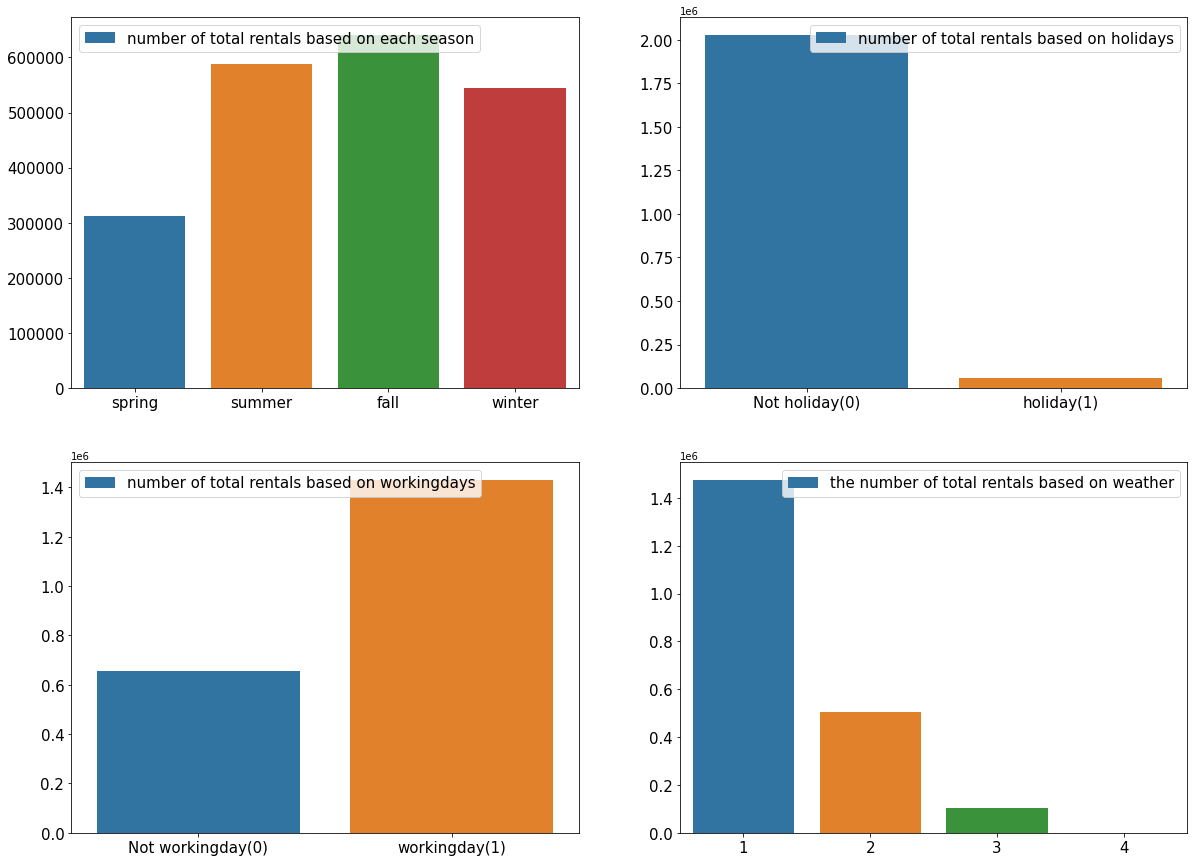

In [9]:
# See some usefull graphs
fig , axes = plt.subplots(2,2,figsize=(20,15))

# Axes[0,0]: Here I want to compare the number of total rentals based on each season
number_of_total_rentals = []
for i in (data.season.unique()):
    number_of_total_rentals.append(data[data.season==i]['count'].sum())
    
sns.barplot(ax=axes[0,0],x=['spring','summer','fall','winter'], y=number_of_total_rentals, label='number of total rentals based on each season',
            )
axes[0,0].legend(loc=2, fontsize=15)
axes[0,0].tick_params(axis='both', which='major', labelsize=15)
# Axes[0,1]: Here I want to compare the number of total rentals based on holidays
number_of_total_rentals = []
for i in (data.holiday.unique()):
    number_of_total_rentals.append(data[data.holiday==i]['count'].sum())

sns.barplot(ax= axes[0,1],x=['Not holiday(0)','holiday(1)'], y=number_of_total_rentals, label='number of total rentals based on holidays')
axes[0,1].legend(loc=1, fontsize=15)
axes[0,1].tick_params(axis='both', which='major', labelsize=15)
# Axes[1,0]: Here I want to compare the number of total rentals based on workingdays
number_of_total_rentals = []
for i in (data.workingday.unique()):
    number_of_total_rentals.append(data[data.workingday==i]['count'].sum())
    
sns.barplot(ax=axes[1,0],x=['Not workingday(0)','workingday(1)'], y=number_of_total_rentals, label='number of total rentals based on workingdays')
axes[1,0].legend(loc=2, fontsize=15)
axes[1,0].tick_params(axis='both', which='major', labelsize=15)
# Axes[1,1]: Here I want to compare the number of total rentals based on weather
number_of_total_rentals= []
for i in (data.weather.unique()):
    number_of_total_rentals.append(data[data.weather==i]['count'].sum())

sns.barplot(ax=axes[1,1],x=['1','2','3','4'], y=number_of_total_rentals, label='the number of total rentals based on weather')
axes[1,1].legend(loc=1, fontsize=15)
axes[1,1].tick_params(axis='both', which='major', labelsize=15)

<AxesSubplot:>

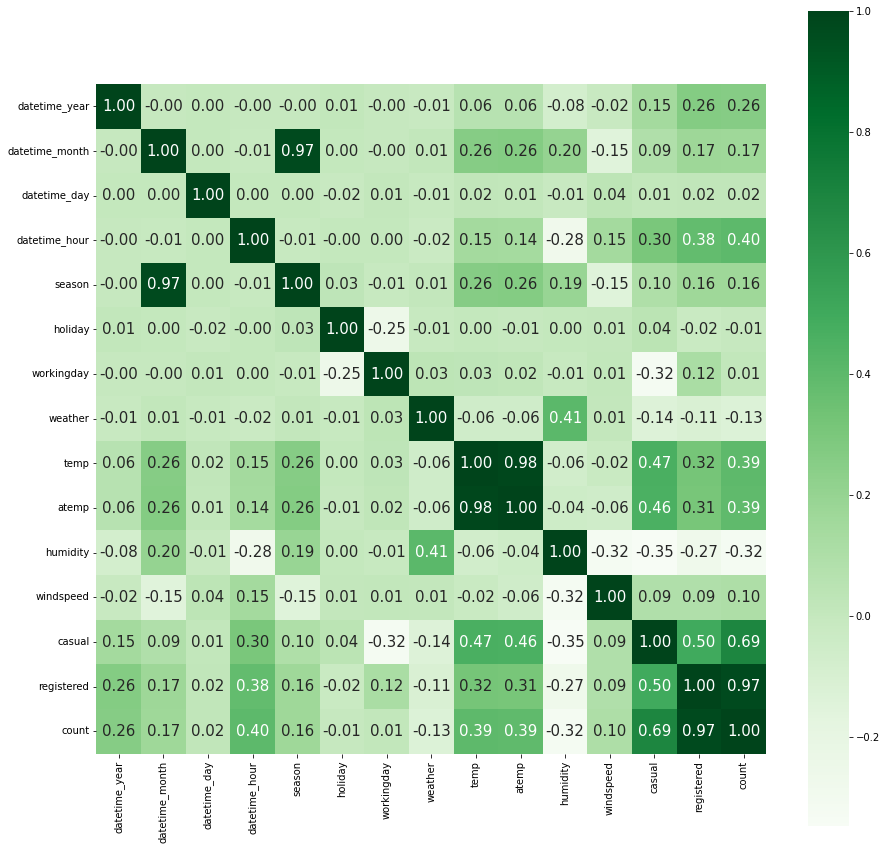

In [10]:
# Find the correlation between parameters
my_correlation = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(my_correlation,cbar=True, square= True, fmt='.2f', annot=True,annot_kws={'size':15}, cmap='Greens')

In [11]:
my_correlation

,datetime_year,datetime_month,datetime_day,datetime_hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime_year,1.000000,-0.004932,0.001800,-0.004234,-0.004797,0.012021,-0.002482,-0.012548,0.061212,0.058534,-0.078606,-0.015220,0.145241,0.264265,0.260403
datetime_month,-0.004932,1.000000,0.001974,-0.006818,0.971524,0.001731,-0.003394,0.012144,0.257566,0.264166,0.204537,-0.150194,0.092722,0.169451,0.166862
datetime_day,0.001800,0.001974,1.000000,0.001132,0.001729,-0.015877,0.009829,-0.007890,0.015506,0.011868,-0.011335,0.036157,0.014109,0.019111,0.019826
datetime_hour,-0.004234,-0.006818,0.001132,1.000000,-0.006546,-0.000354,0.002780,-0.022740,0.145439,0.140323,-0.278011,0.146630,0.302045,0.380540,0.400601
season,-0.004797,0.971524,0.001729,-0.006546,1.000000,0.029368,-0.008126,0.008879,0.258672,0.264735,0.190610,-0.147123,0.096758,0.164011,0.163439
holiday,0.012021,0.001731,-0.015877,-0.000354,0.029368,1.000000,-0.250491,-0.007074,0.000299,-0.005219,0.001929,0.008407,0.043799,-0.020956,-0.005393
workingday,-0.002482,-0.003394,0.009829,0.002780,-0.008126,-0.250491,1.000000,0.033772,0.029951,0.024673,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,-0.012548,0.012144,-0.007890,-0.022740,0.008879,-0.007074,0.033772,1.000000,-0.055052,-0.055345,0.406244,0.007264,-0.135918,-0.109340,-0.128655
temp,0.061212,0.257566,0.015506,0.145439,0.258672,0.000299,0.029951,-0.055052,1.000000,0.984952,-0.064979,-0.017837,0.467116,0.318571,0.394459
atemp,0.058534,0.264166,0.011868,0.140323,0.264735,-0.005219,0.024673,-0.055345,0.984952,1.000000,-0.043490,-0.057484,0.462032,0.314610,0.389753


<div class="alert alert-block alert-success">
    <h2 align="center">Step5: Train the model with different models</h2>
</div> 

### 1st model---->Linear Regression

In [12]:
# Define feature and target: According to the determined correlation, I chose the column temp as our feature and count as our target
x= data[['temp']]
y= data[['count']]

# Splitting data to training and testing data
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=.2,random_state=4)

# Set the model and find coefficient and intercept
regressor = LinearRegression()
regressor.fit(x_train, y_train)
coefficient = regressor.coef_
intercept = regressor.intercept_
print('coefficient = ',coefficient)
print('intercept = ',intercept)

coefficient =  [[9.118423]]
intercept =  [6.441971]


In [13]:
# Predict with our model on x_test
y_predicted = regressor.predict(x_test)

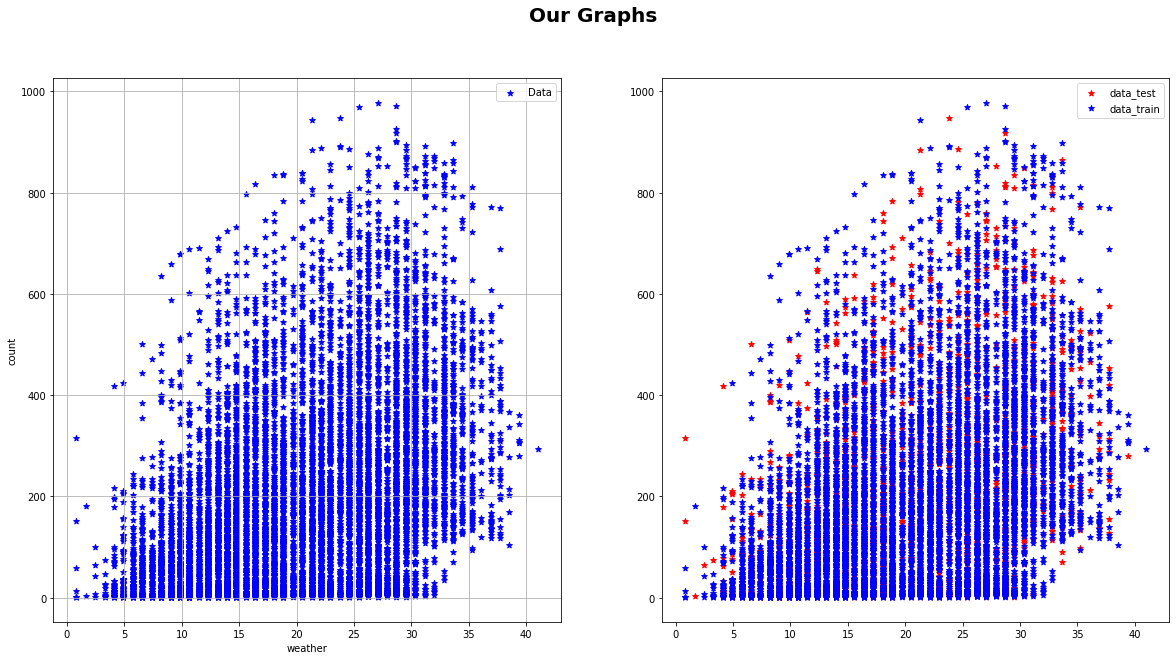

In [14]:
# Plot data with fitline
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Our Graphs', fontweight='bold', fontsize=20)
axs[0].scatter(x=x, y=y, c='blue', marker='*', linewidths=1, label='Data')
axs[0].grid()
axs[0].set(xlabel='weather', ylabel='count')
axs[0].legend()
axs[1].scatter(x=x_test, y=y_test, c='red', marker='*', linewidths=1, label='data_test')
axs[1].scatter(x=x_train, y=y_train, c='blue', marker='*', linewidths=1, label='data_train')
axs[1].legend()

In [15]:
# Create score table and a function to store all scores obtained from different models
form = {'Model':[],'MAE':[],'MSE':[],'sqrt MSE':[]}
score_table = pd.DataFrame(data=form)
def store_scores(name_of_model,position_of_it_in_tabel, y_test, y_predicted):
    score_table.loc[position_of_it_in_tabel,['Model','MAE','MSE','sqrt MSE']] =[name_of_model,
                                                                int(metrics.mean_absolute_error(y_test, y_predicted))
                                                                ,int(metrics.mean_squared_error(y_test, y_predicted))
                                                                ,int(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))] 
    return score_table

store_scores('Linear Regression',0,y_test,y_predicted)

,Model,MAE,MSE,sqrt MSE
0,Linear Regression,128.0,28353.0,168.0


### 2nd model: Linear Regression with multiple features

In [16]:
# Define features and target:
x = data.iloc[:,:-3].values
y = data.iloc[:,-1].values

#Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=2)

# Feature scaling (standardized)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Set the model
regressor1 = LinearRegression()
regressor1.fit(X=x_train, y=y_train)
coefficient = regressor1.coef_
intercept = regressor1.intercept_
print('coefficient = ',coefficient)
print('intercept = ',intercept)

coefficient =  [ 41.255447    31.462767     2.1331882   53.330162    -6.79527
  -0.45421684   0.3306234   -3.5098343   17.678108    34.409817
 -37.808342     3.8956802 ]
intercept =  191.39217


In [17]:
# Predict with our model on x_test
y_predicted = regressor1.predict(x_test)

In [18]:
# Store scores of this model in table
store_scores('Mutiple Lienar Regression',1,y_test,y_predicted)

,Model,MAE,MSE,sqrt MSE
0,Linear Regression,128.0,28353.0,168.0
1,Mutiple Lienar Regression,104.0,19730.0,140.0


### 3rd model: K nearest neighbours

In [19]:
# Define features and target:
x = data.iloc[:,:-3].values
y = data.iloc[:,-1].values

#Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=2)

# Feature scaling (standardized)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Text(0, 0.5, 'MAE')

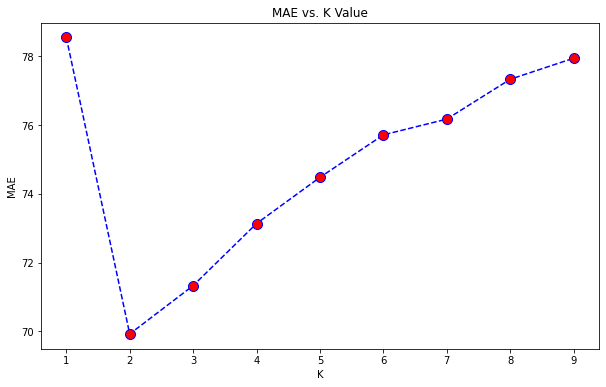

In [20]:
# Now we must find the optimal value for k with plotting MAE, so we have:
MAE_list = []
for i in range(1,10):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_predicted = knn.predict(x_test)
    MAE_list.append(metrics.mean_absolute_error(y_test,y_predicted))

#Plot the values in MAE_list
plt.figure(figsize=(10,6))
plt.plot(range(1,10),MAE_list,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('MAE vs. K Value')
plt.xlabel('K')
plt.ylabel('MAE')

In [21]:
# So the best k is equal to 2 for us
# Set the model and train it
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(x_train,y_train)
y_predicted = knn.predict(x_test)

In [22]:
# Store scores of this model in score_table
store_scores('K_Nearest neighbour',2,y_test,y_predicted)

,Model,MAE,MSE,sqrt MSE
0,Linear Regression,128.0,28353.0,168.0
1,Mutiple Lienar Regression,104.0,19730.0,140.0
2,K_Nearest neighbour,69.0,12610.0,112.0


### 4th model: Decision tree

In [23]:
# Define features and target:
x = data.iloc[:,:-3].values
y = data.iloc[:,-1].values

#Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=2)

# Feature scaling (standardized)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Set the model and train it
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [24]:
# Store scores of this model in score_table
store_scores('Decision tree',3,y_test,y_predicted)

,Model,MAE,MSE,sqrt MSE
0,Linear Regression,128.0,28353.0,168.0
1,Mutiple Lienar Regression,104.0,19730.0,140.0
2,K_Nearest neighbour,69.0,12610.0,112.0
3,Decision tree,69.0,12610.0,112.0


### 5th model: Random forest

In [25]:
# Define features and target:
x = data.iloc[:,:-3].values
y = data.iloc[:,-1].values

#Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=2)

# Feature scaling (standardized)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
# Now we must find the optimal value for estimators ot trees with plotting MAE, so we have:
MAE_list =[]
print('The program is finding the best number for trees in the model. Please wait.')
for i in range(50,550,50):
    regressor = RandomForestRegressor(n_estimators = i, random_state = 0)
    regressor.fit(x_train,y_train)
    y_predicted = regressor.predict(x_test)
    MAE_list.append(metrics.mean_absolute_error(y_test,y_predicted))
    print("({}% of the program completed)".format(100*i//500))

The program is finding the best number for trees in the model. Please wait.
(10% of the program completed)
(20% of the program completed)
(30% of the program completed)
(40% of the program completed)
(50% of the program completed)
(60% of the program completed)
(70% of the program completed)
(80% of the program completed)
(90% of the program completed)
(100% of the program completed)


Text(0, 0.5, 'MAE')

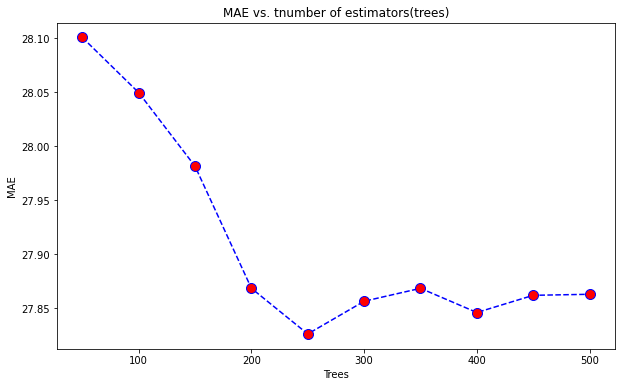

In [27]:
#Plot the values in MAE_list
plt.figure(figsize=(10,6))
plt.plot(range(50,550,50),MAE_list,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('MAE vs. tnumber of estimators(trees)')
plt.xlabel('Trees')
plt.ylabel('MAE')

In [28]:
# So the best value for trees is equal to 250 for us
# Set the model and train it
regressor = RandomForestRegressor(n_estimators = 250, random_state = 0)
regressor.fit(x_train,y_train)
y_predicted = regressor.predict(x_test)

In [29]:
# Store scores of this model in score_table
store_scores('Random Forest',4,y_test,y_predicted)

,Model,MAE,MSE,sqrt MSE
0,Linear Regression,128.0,28353.0,168.0
1,Mutiple Lienar Regression,104.0,19730.0,140.0
2,K_Nearest neighbour,69.0,12610.0,112.0
3,Decision tree,69.0,12610.0,112.0
4,Random Forest,27.0,2076.0,45.0


<div class="alert alert-block alert-success">
    <h2 align="center">Step6: Find the the results for real data, which here is called test.csv file</h2>
</div> 

In [33]:
# Now it's time to run the best model "Random forest" with good results on test.csv file(real data) to predict Count values
x_unseed = data_unseen.iloc[:,:].values # Set features of the dataset(test.csv, called data_unseen) to run prediction  on them
y_unseen = regressor.predict(x_unseed)

# Turn y_unseen to a data frame 
y_unseen = pd.DataFrame(data= y_unseen, columns=['Count'])

# Concatenate y_unseen to data_unseen and name it sampleSubmission
sampleSubmission = pd.concat([data_unseen, y_unseen], axis=1)
# Save this results as sampleSubmission.csv
sampleSubmission.to_csv(path_or_buf='sampleSubmission.csv', index=False)

# Congratulations. We have done it together.Take a look at scores and results in the real data
score_table

,Model,MAE,MSE,sqrt MSE
0,Linear Regression,128.0,28353.0,168.0
1,Mutiple Lienar Regression,104.0,19730.0,140.0
2,K_Nearest neighbour,69.0,12610.0,112.0
3,Decision tree,69.0,12610.0,112.0
4,Random Forest,27.0,2076.0,45.0


In [32]:
sampleSubmission

,datetime_year,datetime_month,datetime_day,datetime_hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Count
0,2011,1,20,0,1,0,1,1,10.66,11.365,56,26.0027,177.348
1,2011,1,20,1,1,0,1,1,10.66,13.635,56,0.0000,558.712
2,2011,1,20,2,1,0,1,1,10.66,13.635,56,0.0000,148.608
3,2011,1,20,3,1,0,1,1,10.66,12.880,56,11.0014,144.424
4,2011,1,20,4,1,0,1,1,10.66,12.880,56,11.0014,144.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012,12,31,19,1,0,1,2,10.66,12.880,60,11.0014,132.936
6489,2012,12,31,20,1,0,1,2,10.66,12.880,60,11.0014,132.936
6490,2012,12,31,21,1,0,1,1,10.66,12.880,60,11.0014,144.492
6491,2012,12,31,22,1,0,1,1,10.66,13.635,56,8.9981,144.492
